# Native Painted Turtles (cpb) 2008-2017
Statistical Analysis of a turtle population "Chysemmys picta belli" at two locations in the pacific north west surveyed between 2008 and 2017


## Data cleaning and new features
### data cleaning and aggreagation
 **Species** are recorded to either *Cbp* (native painted turtle) or *Res* (read eared sliders). This analysis only looks at Cbp-Native-Turtles
 
 **Gravid** *True* femal turtle carrying eggs
 
 **Sex** *m*, *f* or *unknown*
 
 **Carapace**, **Plastron**, **Weight** cleaned decimals.. only decimals >0 utilized in analysis
 
 **Weight** a value > 0 means recorded survey. Value = 0 means repeat sighting and not relevant for analisis
 
 ### new features
 **new_annuli** its very hard to acuratly count the annuli for older surveys. Different surveyors might come up with different annuli values for the same turtle. Further, it becomes harder the older the turtle gets. Thus for some old turtles it is inpossilbe to asses the annuli. For that reason a new feature **new_annuli** is created. We conservativley take the lowest ever counted annuli for an individualy turtle and then increment its annuli for each sighting in following years. Pseudo Code:
> new_annuli = (year_of_sighting - year_of_very_fist_sighting) + lowest_annuli_ever_recorded 

**gender_plus** *m*, *f*, *f_gra*, *unknown* (distinguishes non-gravid  and gravid females)

**gender_seasons** *m_fal*, *m_spr*, *f_spr*, *f_fala*, *f_gra*, *unknown* distinguishes seasons "fall" and "spring"

 
 
 

In [1]:
#Prepping the notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# my custom helper functions
import helpers as hlp
import turtles
import scipy
import pandas as pd
#filter data: Naitive turle and relevant
print ("Filtering Natives ...")
natives = turtles.get_clean_data()
natives = natives[natives['Weight']!=0]
natives = natives[natives['Carapace']!=0]
natives = natives[natives['Plastron']!=0]
natives = natives[natives['Species']=='Cpb']
print ("Done")


Filtering Natives ...
Loading data /Users/kim/Projects/turtles-way-down/source/Turtle Data.xls
2008
2009
2010
2011
2012
2013
2014
Cleaning decimals ...
Cleaning other values ...
Loading data /Users/kim/Projects/turtles-way-down/source/MF Trapping Data.xls
Cleaning decimals ...
Cleaning other values ...
Done


## EDA - Exploratory Data Analysis

basic metrics (sanity check that the data loaded correct)

In [2]:
#Show some data - basic metrics
natives[['Carapace','Plastron','Annuli','Weight']].describe()

Carapace    Plastron      Annuli       Weight
count  888.000000  888.000000  888.000000   888.000000
mean   140.332336  132.643539    5.436937   470.087524
std     39.513756   38.517132    3.438044   362.312073
min     32.740002   29.730000    0.000000     7.050000
25%    110.362501  103.987499    3.000000   197.750000
50%    132.339996  125.000000    5.000000   318.000000
75%    175.520000  165.000000    7.000000   694.750000
max    237.199997  242.199997   20.000000  1435.000000

In [3]:
#Show some data - Gender, Location etc
natives[['Species','Capture Location','Source','ID']].pivot_table(index=['Capture Location','Source','Species'],aggfunc='count')

ID
Capture Location Source                                Species     
Gresham          Turtle Data.xls|2008                  Cpb       48
                 Turtle Data.xls|2009                  Cpb       14
                 Turtle Data.xls|2010                  Cpb       48
                 Turtle Data.xls|2011                  Cpb      114
                 Turtle Data.xls|2012                  Cpb      187
                 Turtle Data.xls|2013                  Cpb      103
                 Turtle Data.xls|2014                  Cpb      225
Mason Flats      MF Trapping Data.xls|All Capture Data Cpb      149

# Swarmplots 
## Swarmplots to show distribution of Carapace, Plastron and Weight by Gender
The following plot shows: the min/max size(weight) for each sex as well as how much diversity there is in weights in a given population. Most males are under 400g, females peak at 400 and 1000g.

Plotting swarm plot with 888 samples...


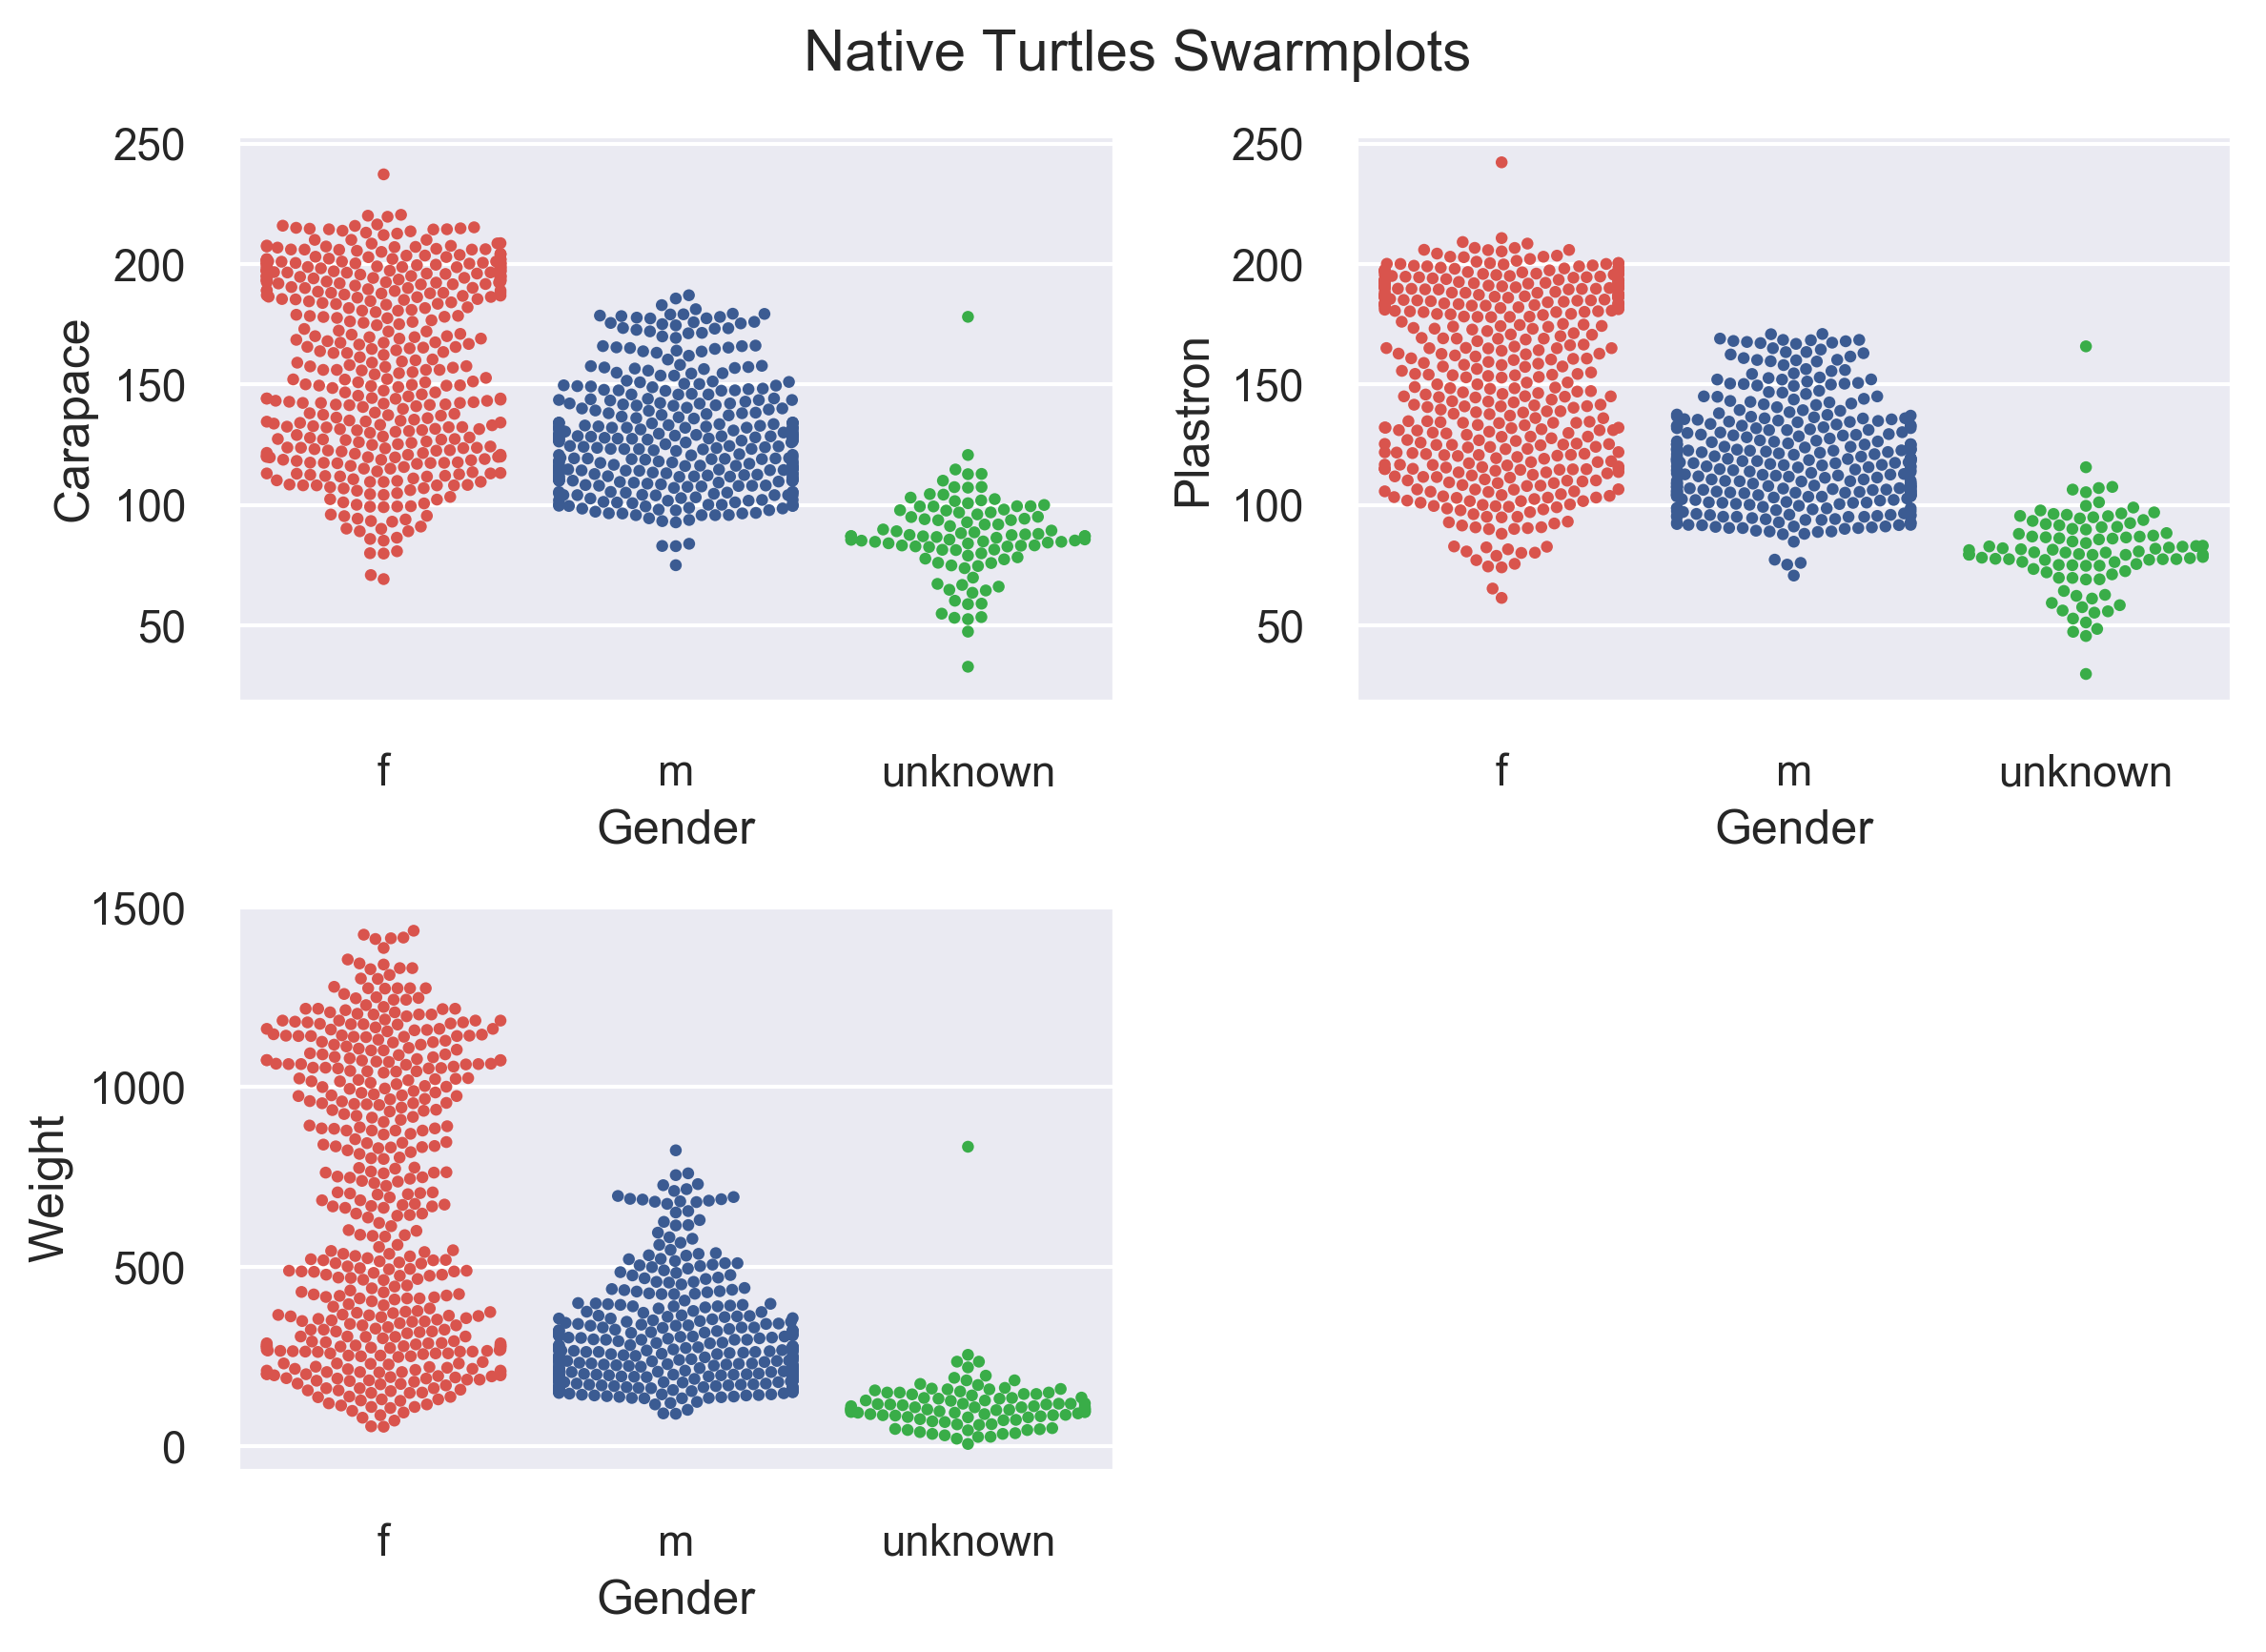

In [4]:
### Basic Swarmplot to show Carapace / Plastron / Weight by Gender
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]

print ("Plotting swarm plot with " + str(natives.Weight.count()) + ' samples...')
sns.set()
_ = plt.figure(1)
_ = plt.suptitle('Native Turtles Swarmplots ')

_1 =plt.subplot(2,2,1)
_ = sns.swarmplot(x='Gender', y='Carapace', data=natives,size=3,palette=colors)
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
_ = sns.swarmplot(x='Gender', y='Plastron', data=natives,size=3,palette=colors)
_ = plt.ylabel('Plastron')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])
_ = plt.subplot(2,2,3)
_ = sns.swarmplot(x='Gender', y='Weight', data=natives,size=3,palette=colors)
_ = plt.xlabel('Gender')
_ = plt.ylabel('Weight')

# Weight, Carapace and Plastron distibution by sex
Weight, carapace and plastron show the same pattern - females ultimately grow larger and heavier than males.  Trapping will show a greater diversity in female sizes/weights than with males. I am curious about the outliers.

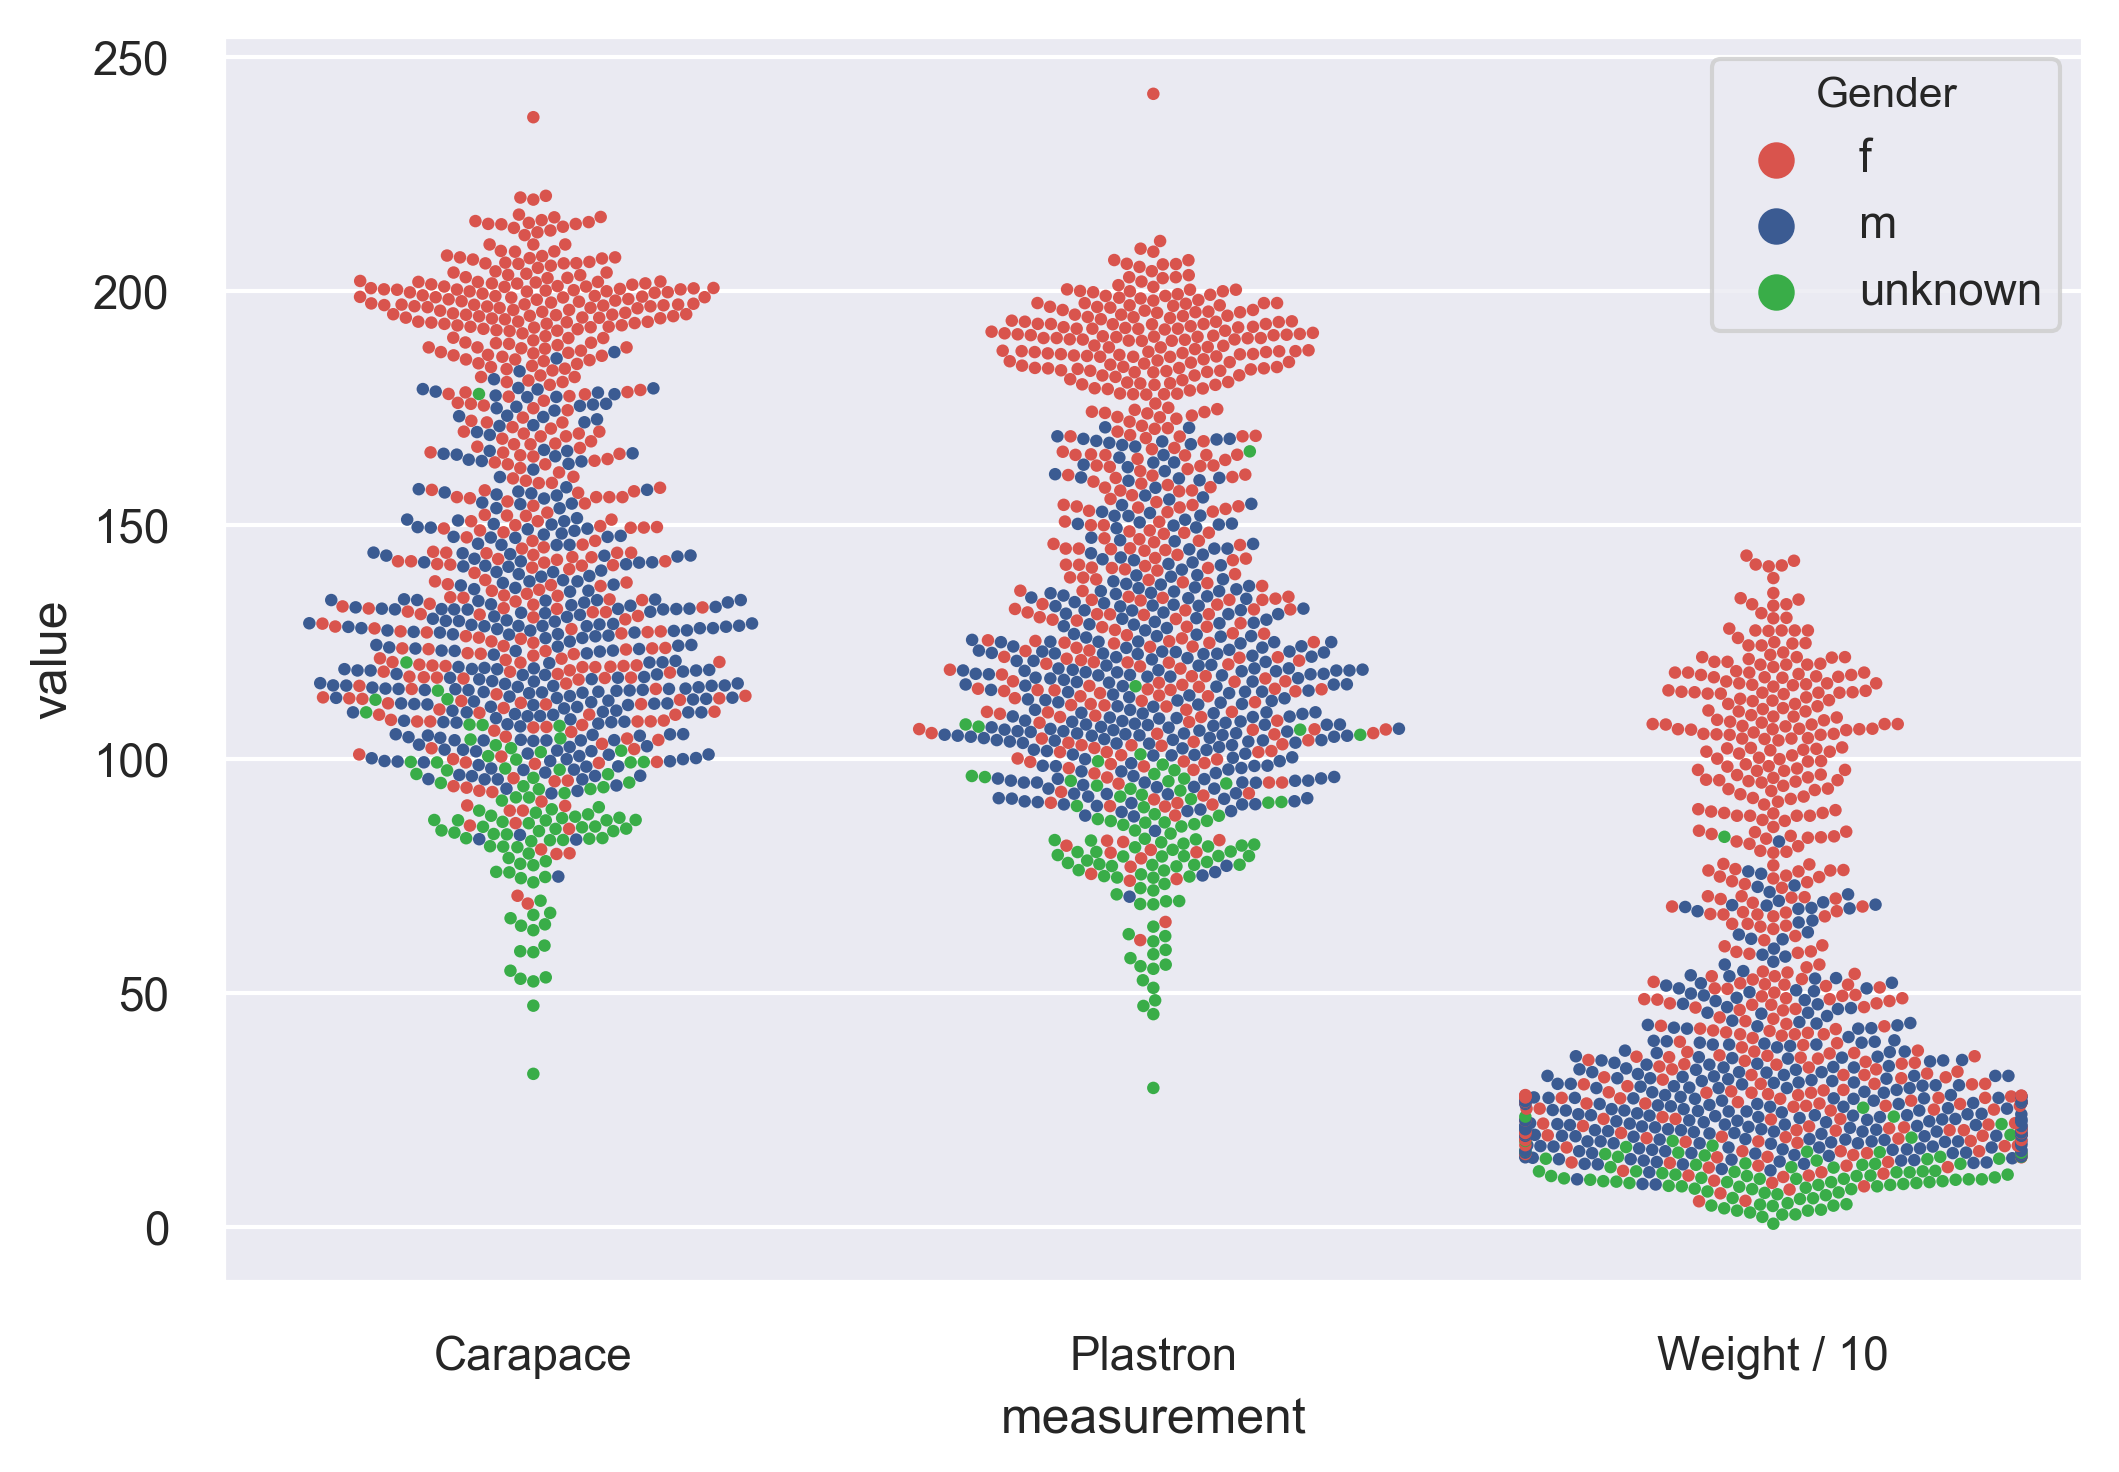

In [5]:
#
natives_melted = natives.copy()
natives_melted['Weight / 10'] = natives_melted.Weight.div(10)
natives_melted = pd.melt(natives_melted[['Carapace','Plastron','Weight / 10','Gender']],'Gender',var_name='measurement')

_ = sns.swarmplot(x="measurement", y="value", hue="Gender", data=natives_melted,palette=colors,size=3)
_ = plt.show()

# ECDF Graph of size/weight distribution by sex
 Shows the difference in size/weight distributions between sexes; males have a nice bell curve with an even growth rate throughout life; females have 2 bumps one at 400g/150mm carapace and plastron and the other at 1000g, and 200mm shell size.

Plotting Cumulative Distribution Function with 888 samples...


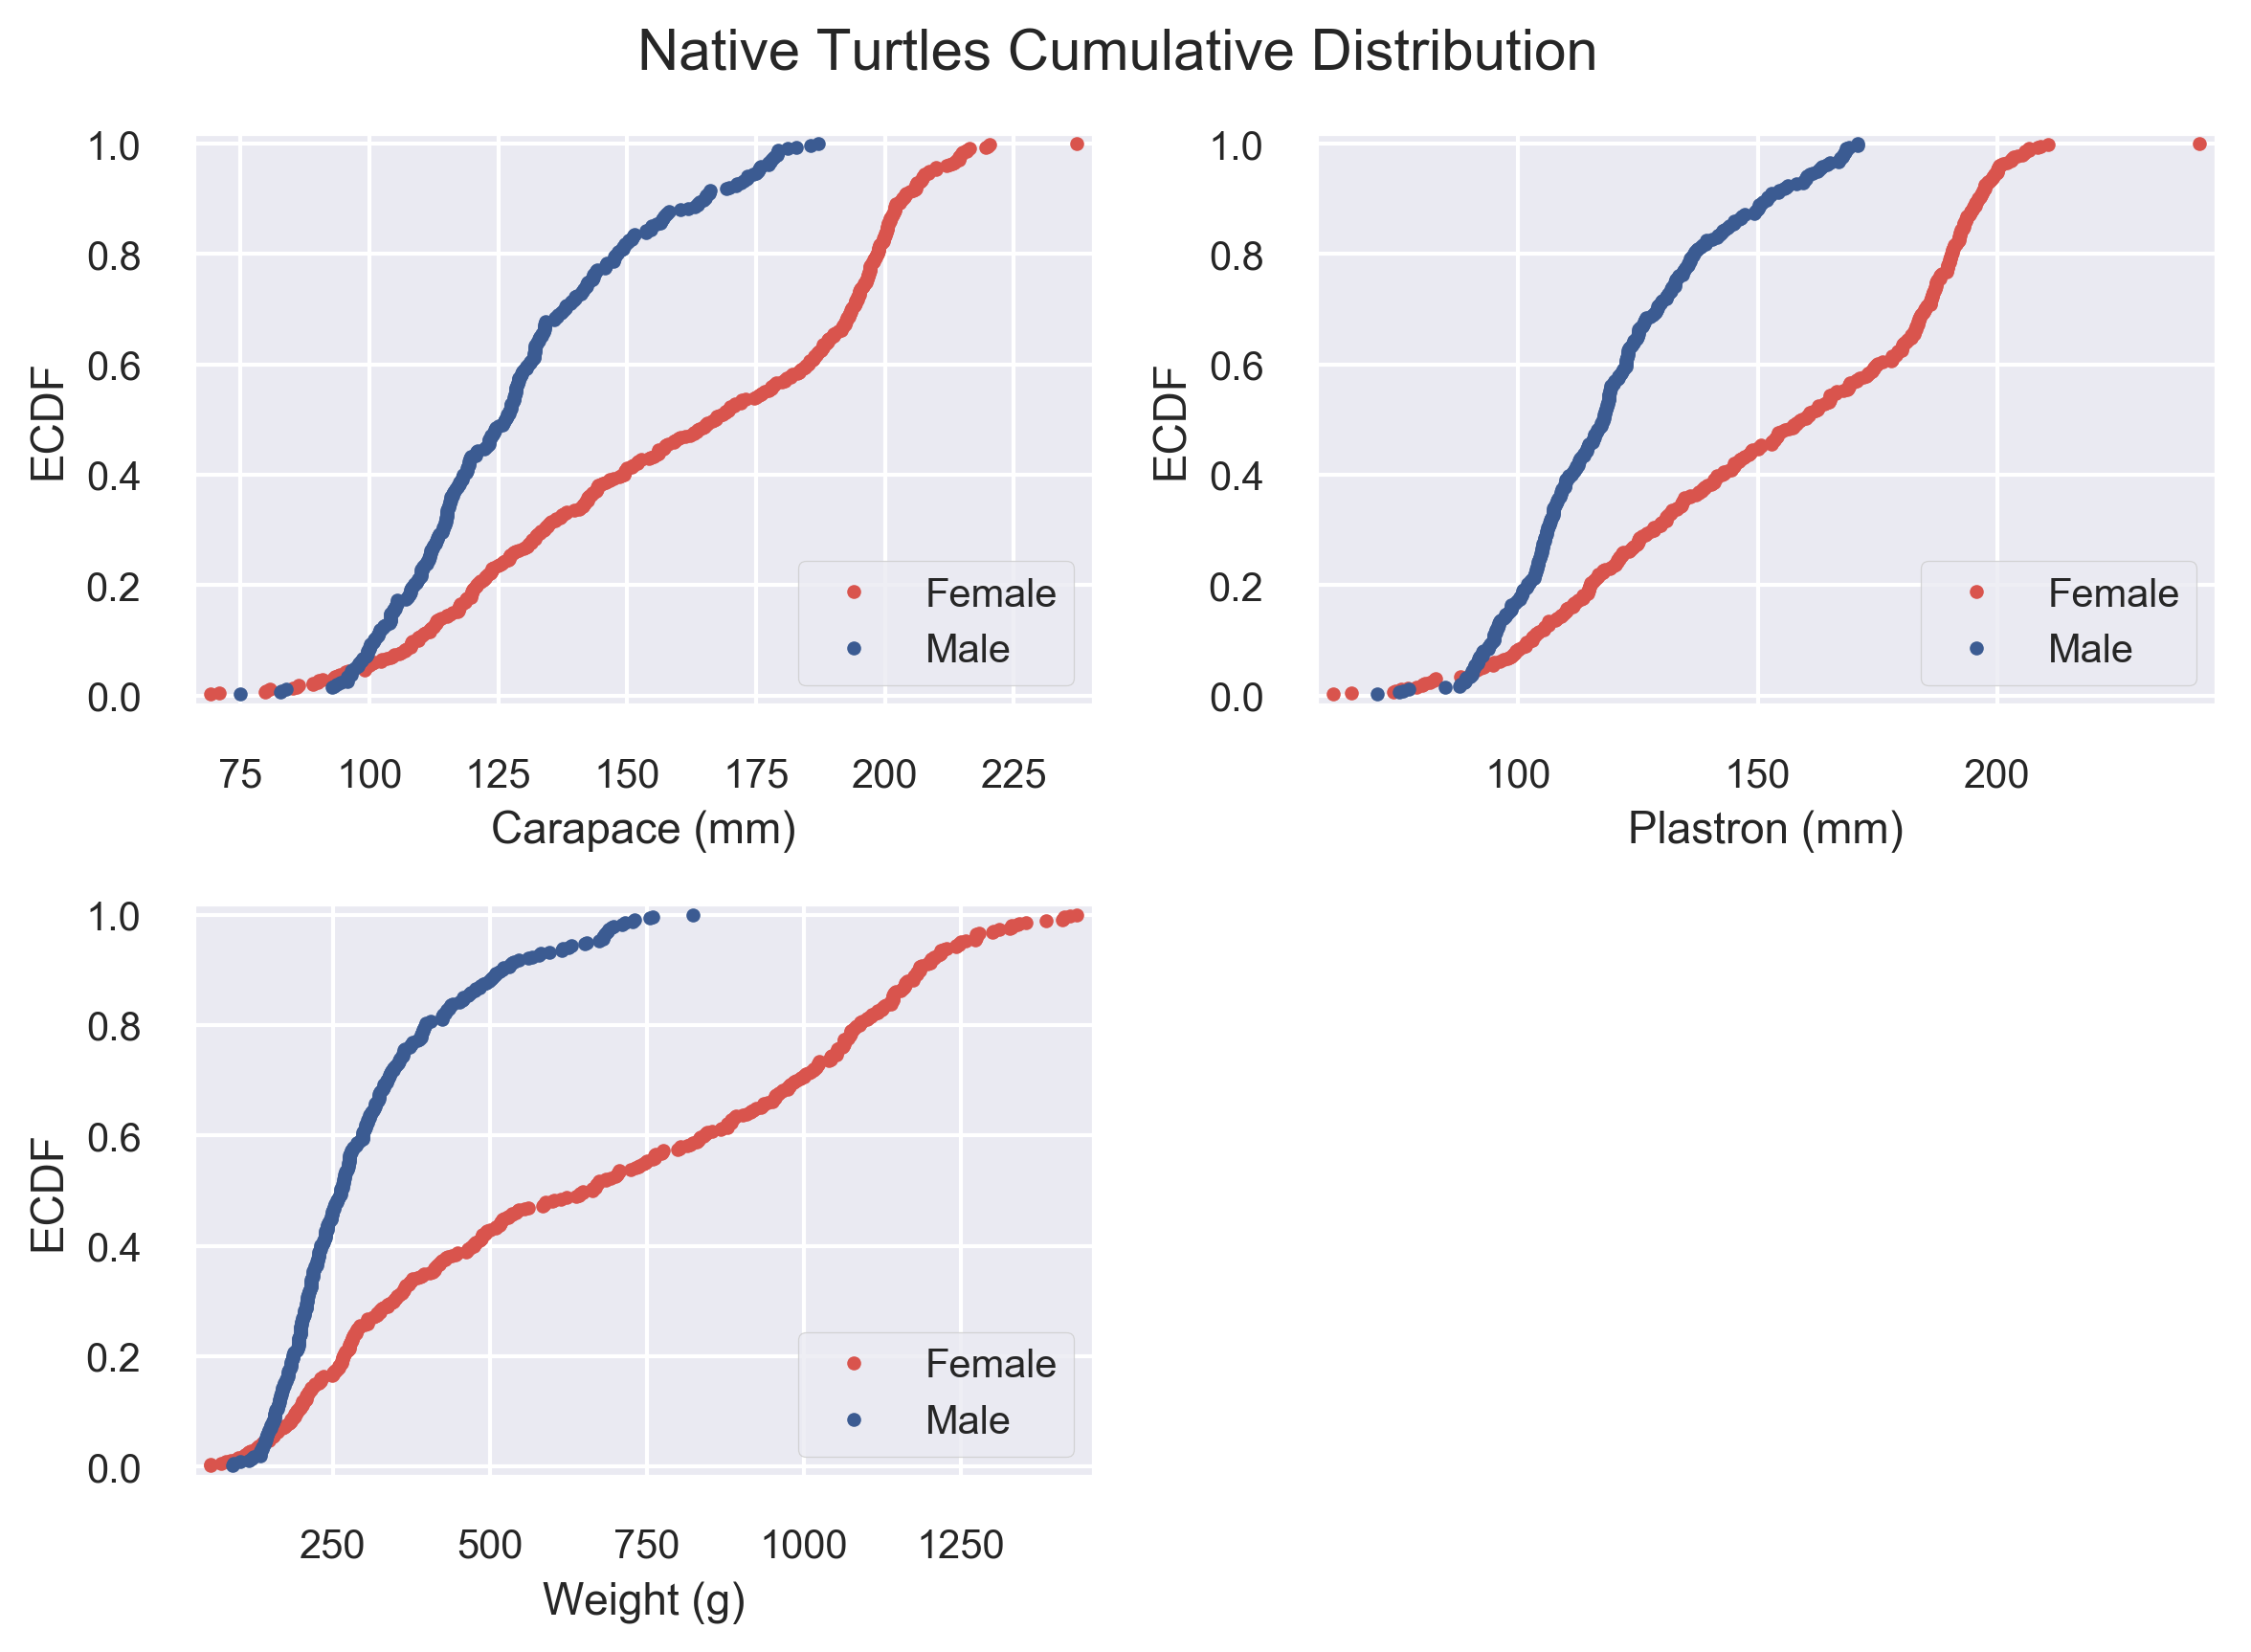

In [6]:
### Same information as beswars above just displayed as ECDFs
plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue']]


print ("Plotting Cumulative Distribution Function with " + str(natives.Weight.count()) + ' samples...')
# Compute ECDFs

_ = plt.figure(2)
_ = plt.suptitle('Native Turtles Cumulative Distribution ')

x_CarapaceF, y_CarapaceF = hlp.ecdf(natives[natives['Gender']=='f']['Carapace'])
x_CarapaceM, y_CarapaceM = hlp.ecdf(natives[natives['Gender']=='m']['Carapace'])

_ = plt.subplot(2,2,1)
_ = plt.plot(x_CarapaceF, y_CarapaceF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_CarapaceM, y_CarapaceM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Carapace (mm)')
_ = plt.ylabel('ECDF')

x_PlastronF, y_PlastronF = hlp.ecdf(natives[natives['Gender']=='f']['Plastron'])
x_PlastronM, y_PlastronM = hlp.ecdf(natives[natives['Gender']=='m']['Plastron'])

_ = plt.subplot(2,2,2)
_ = plt.plot(x_PlastronF, y_PlastronF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_PlastronM, y_PlastronM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Plastron (mm)')
_ = plt.ylabel('ECDF')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

x_WeightF, y_WeightF = hlp.ecdf(natives[natives['Gender']=='f']['Weight'])
x_WeightM, y_WeightM = hlp.ecdf(natives[natives['Gender']=='m']['Weight'])

_ = plt.subplot(2,2,3)
_ = plt.plot(x_WeightF, y_WeightF, marker='.',linestyle = 'none',color=colors[0])
_ = plt.plot(x_WeightM, y_WeightM, marker='.',linestyle = 'none',color=colors[1])
_ = plt.margins(0.02)
_ = plt.legend(('Female', 'Male'), loc='lower right')
_ = plt.xlabel('Weight (g)')
_ = plt.ylabel('ECDF')

# Female size/weight vs age
Shows similar pattern to the ECDF graphs - females show 2 distinct "bumps" suggesting that there are two concentrations of female animals in the population.

Plotting Histogram Weight, Carapace and Plastron with 433 samples...


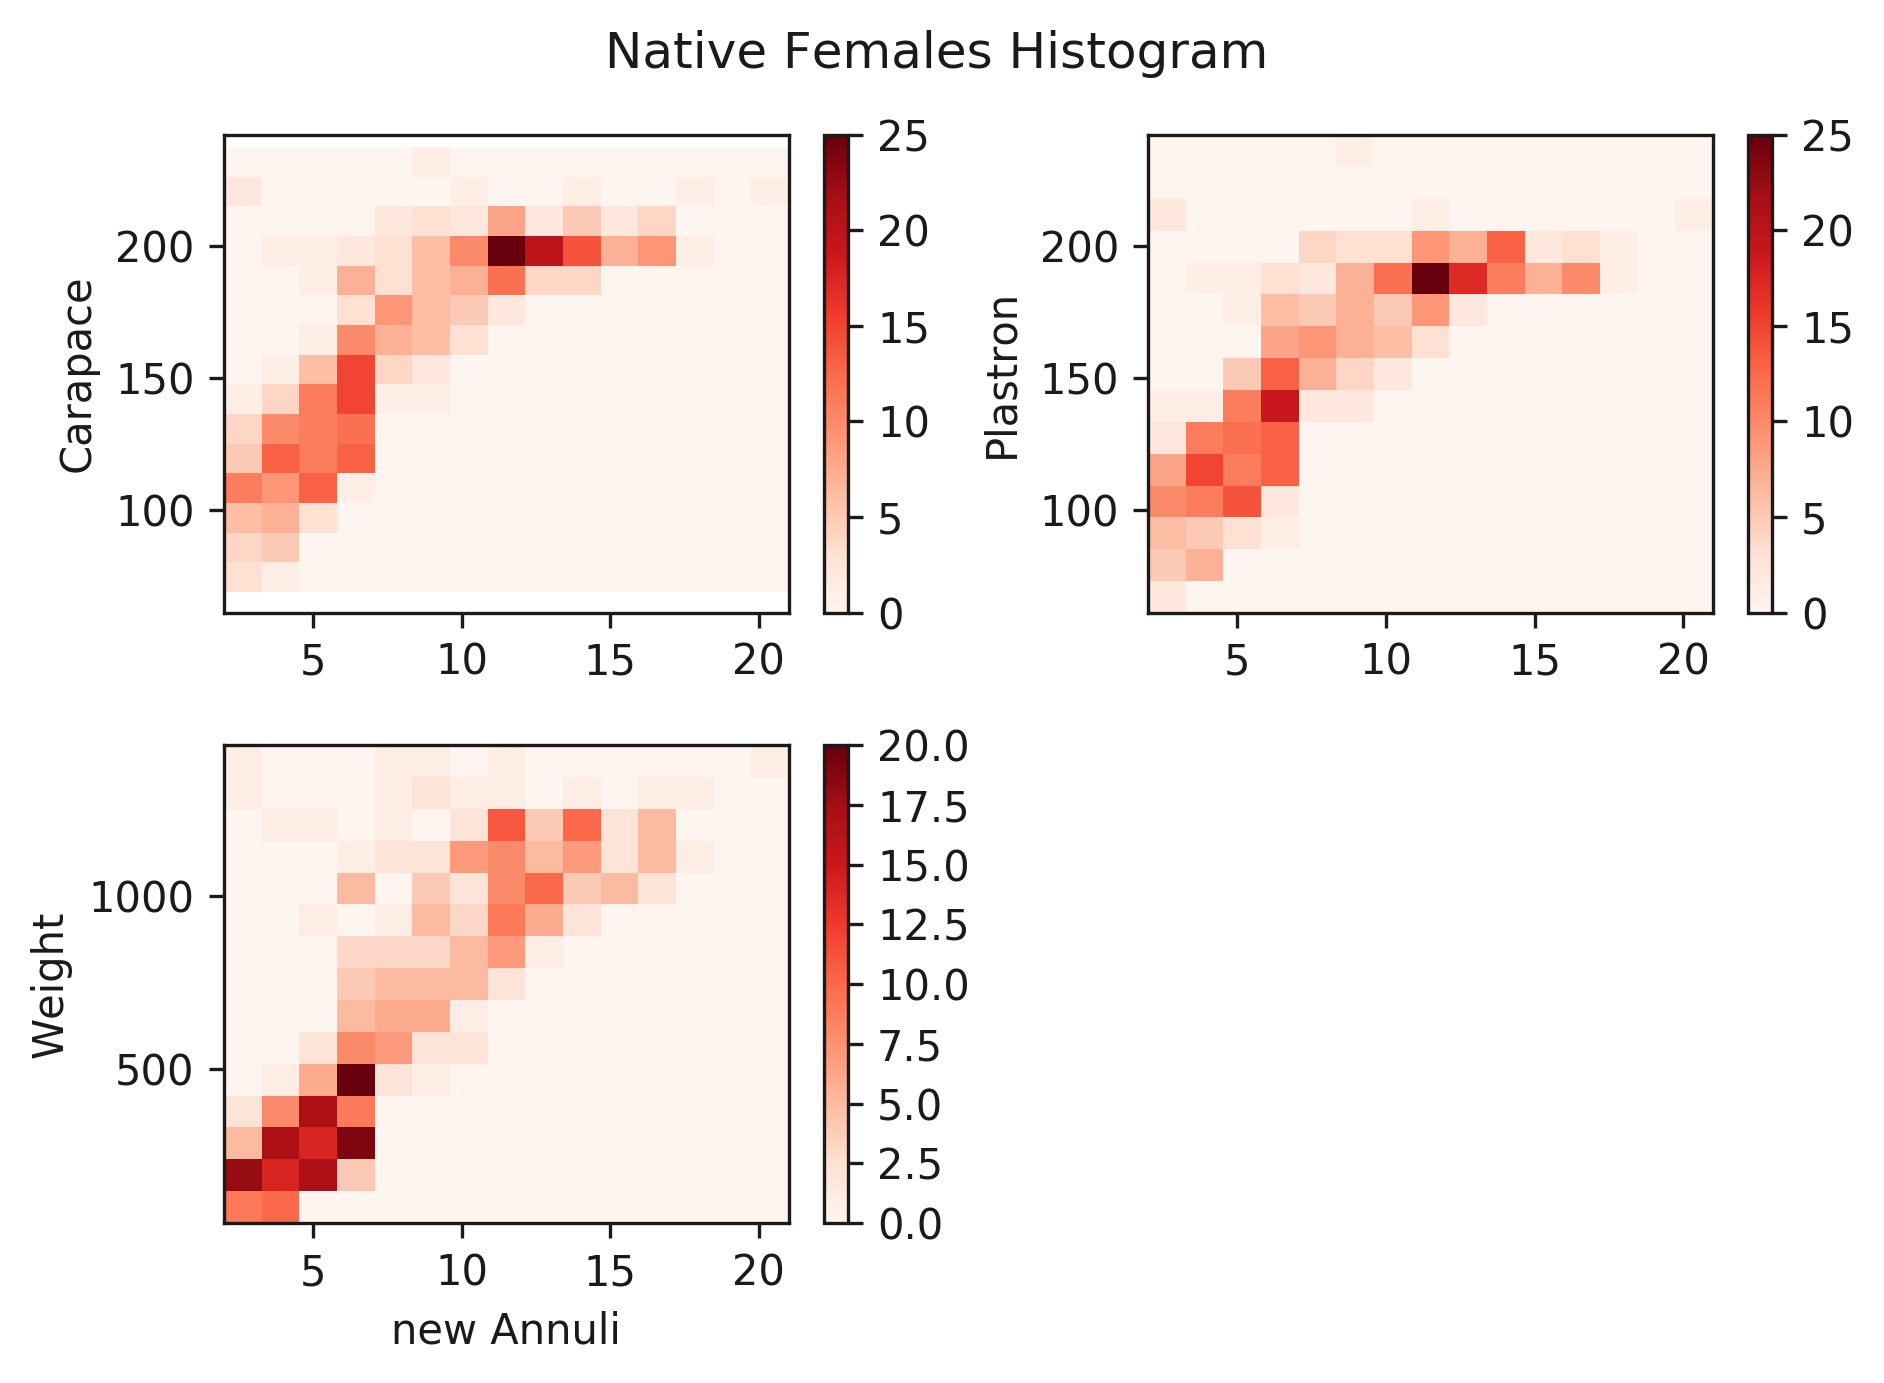

In [7]:
#2d histogram Carapace / Plastron / Weight - Females
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### FEMALE
females = natives[natives['Gender']=='f']
females = females[females['new_annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(females.Weight.count()) + ' samples...')

_ = plt.figure(3)
_1 =plt.subplot(2,2,1)

#_ = plt.scatter(females['Annuli'], females['Carapace'])
_ = plt.hist2d(females['new_annuli'], females['Carapace'],cmap='Reds',bins=(15,15))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(females['Annuli'],females['Plastron'])
_ = plt.hist2d(females['new_annuli'], females['Plastron'],cmap='Reds',bins=(15,15))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Females Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(females['Annuli'], females['Weight'],s=10)
_ = plt.hist2d(females['new_annuli'], females['Weight'],cmap='Reds',bins=(15,15))
_ = plt.colorbar()
_ = plt.xlabel('new Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Males size/weight vs age
Males show one concentration of animals, suggesting a "normal bell curve" distribution.

Plotting Histogram Weight, Carapace and Plastron with 334 samples...


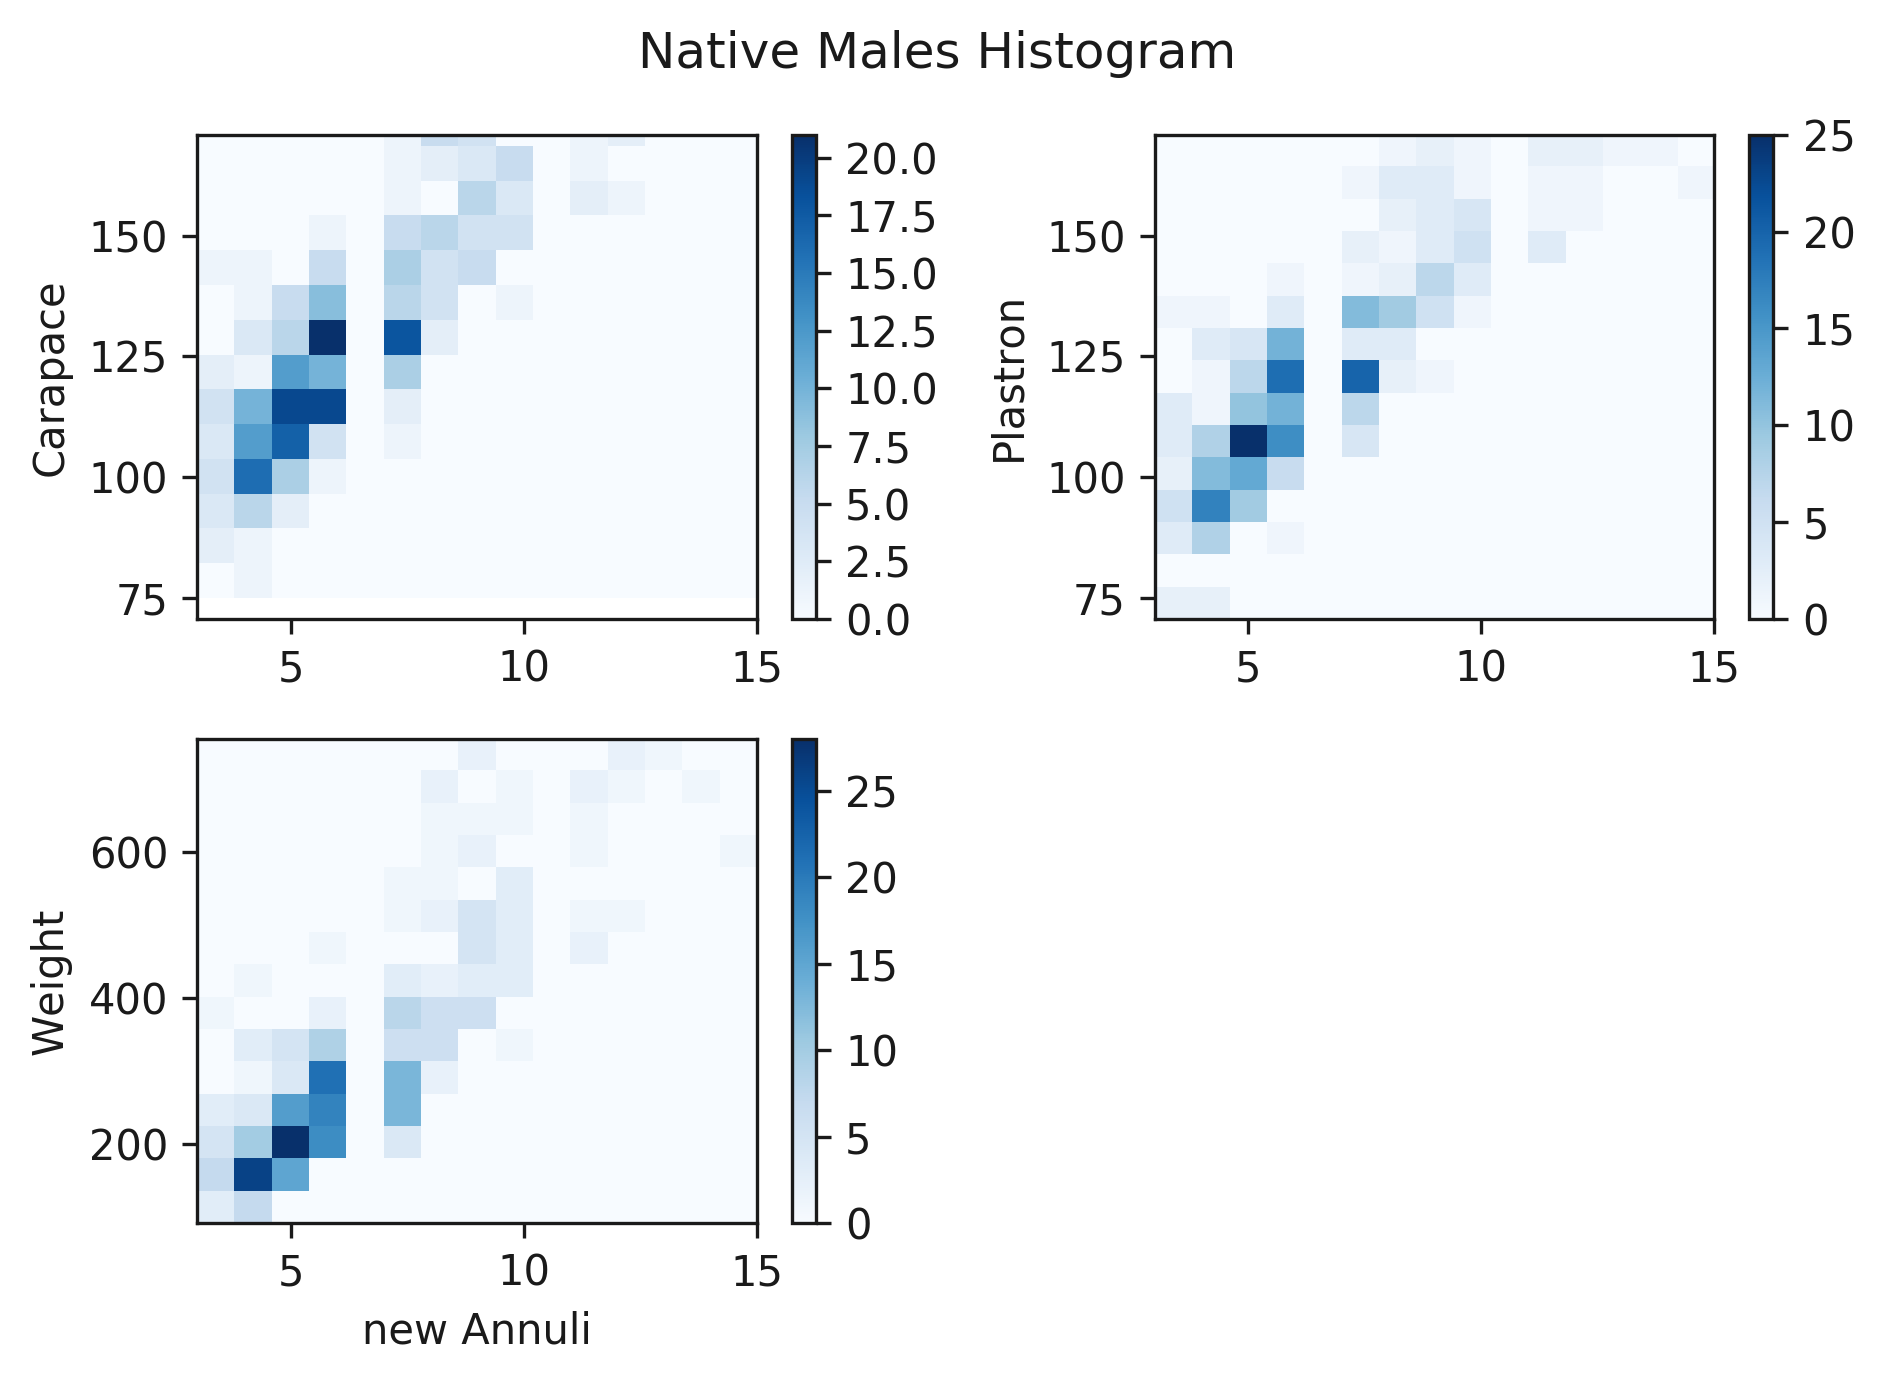

In [8]:
##2d histogram Carapace / Plastron / Weight - Males
sns.reset_orig()
#plt.style.use('seaborn-notebook')
plt.rcParams['figure.dpi'] = 300
## Lineplot Age + Weight, Carapace, Plastron

### MALE
males = natives[natives['Gender']=='m']
males = males[males['new_annuli']!=0]
print ("Plotting Histogram Weight, Carapace and Plastron with " + str(males.Weight.count()) + ' samples...')

_ = plt.figure(3)

_1 =plt.subplot(2,2,1)
#_ = plt.scatter(males['Annuli'], males['Carapace'])
_ = plt.hist2d(males['new_annuli'], males['Carapace'],cmap='Blues',bins=(15,15))
_ = plt.colorbar()
_ = plt.ylabel('Carapace')

_2 =plt.subplot(2,2,2,sharey=_1)
#_ = plt.scatter(males['Annuli'],males['Plastron'])
_ = plt.hist2d(males['new_annuli'], males['Plastron'],cmap='Blues',bins=(15,15))
_ = plt.colorbar()
_ = plt.ylabel('Plastron')

_ = plt.suptitle('Native Males Histogram ')
_ = plt.subplot(2,2,3)
#_ = plt.scatter(males['Annuli'], males['Weight'],s=10)
_ = plt.hist2d(males['new_annuli'], males['Weight'],cmap='Blues',bins=(15,15))
_ = plt.colorbar()
_ = plt.xlabel('new Annuli')
_ = plt.ylabel('Weight')
_ = plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Weight distributions across 2 separate populations
The hypothesis: same distribution in all capture locations proved true

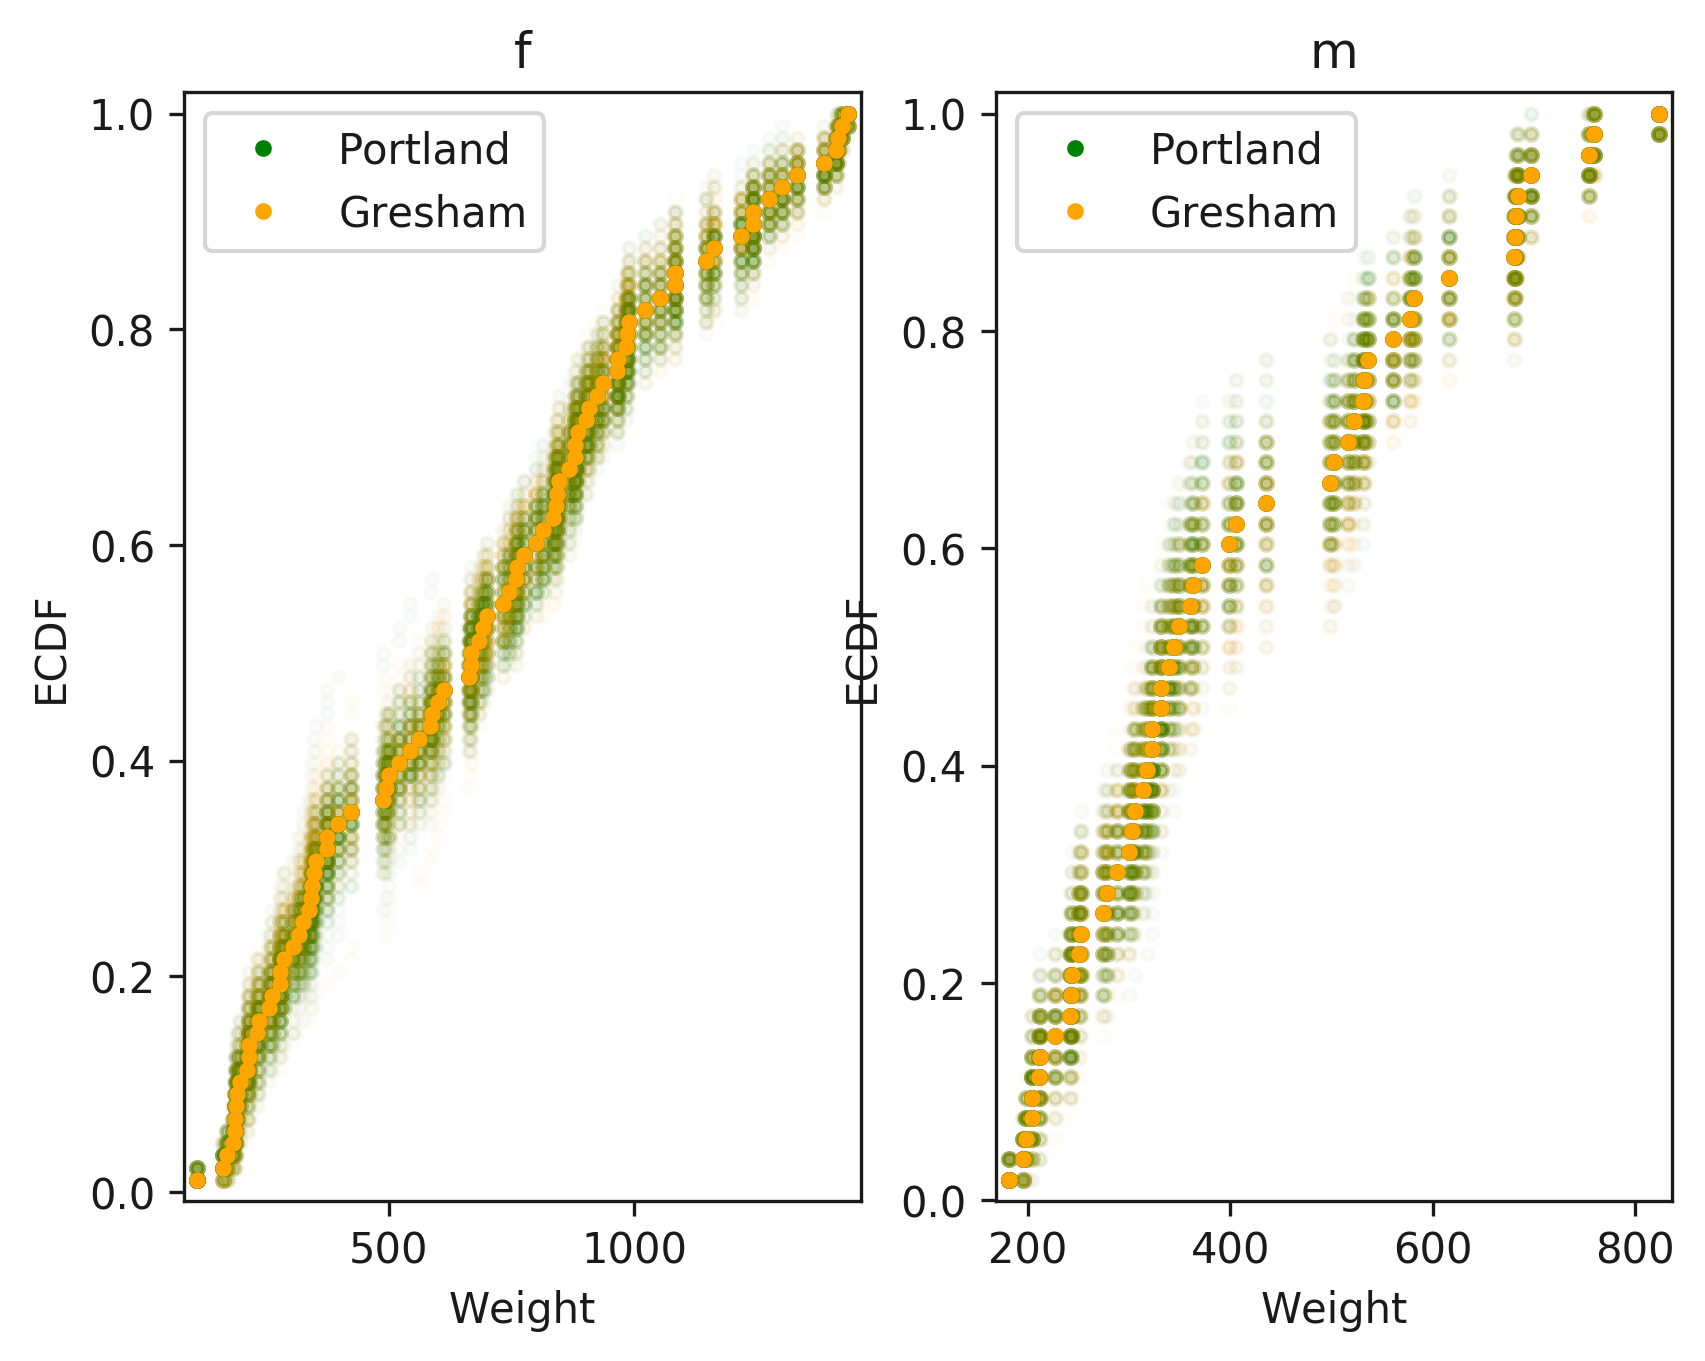

In [9]:
#Hyposis: same distribution in all capture locations
native_portland = natives[(natives['Capture Location']=='Mason Flats')]
native_gresham = natives[(natives['Capture Location']=='Gresham') ]
#&(natives['Gender']=='f')
genders = ['f','m']
dimension = 'Weight'
_ = plt.figure(6)
i = 0
for gender in genders:
    i += 1
    _ = plt.subplot(1,2,i)
    for _ in range(100):
        # Generate permutation samples
        native_portland_gender = native_portland[native_portland['Gender']==gender]
        native_gresham_gender = native_portland[native_portland['Gender']==gender]
        perm_sample_1, perm_sample_2 = hlp.permutation_sample(native_portland_gender[dimension],native_gresham_gender[dimension])

        # Compute ECDFs
        x_1, y_1 = hlp.ecdf(perm_sample_1)
        x_2, y_2 = hlp.ecdf(perm_sample_2)

        # Plot ECDFs of permutation sample
        _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                     color='green', alpha=0.02)
        _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                     color='orange', alpha=0.02)

    # Create and plot ECDFs from original data
    x_1, y_1 = hlp.ecdf(native_portland_gender[dimension])
    x_2, y_2 = hlp.ecdf(native_portland_gender[dimension])
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='green',label='Portland')
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='orange',label='Gresham')
    _ = plt.legend()
    _ = plt.title(gender)
    # Label axes, set margin, and show plot
    plt.margins(0.02)
    _ = plt.xlabel(dimension)
    _ = plt.ylabel('ECDF')
plt.show()

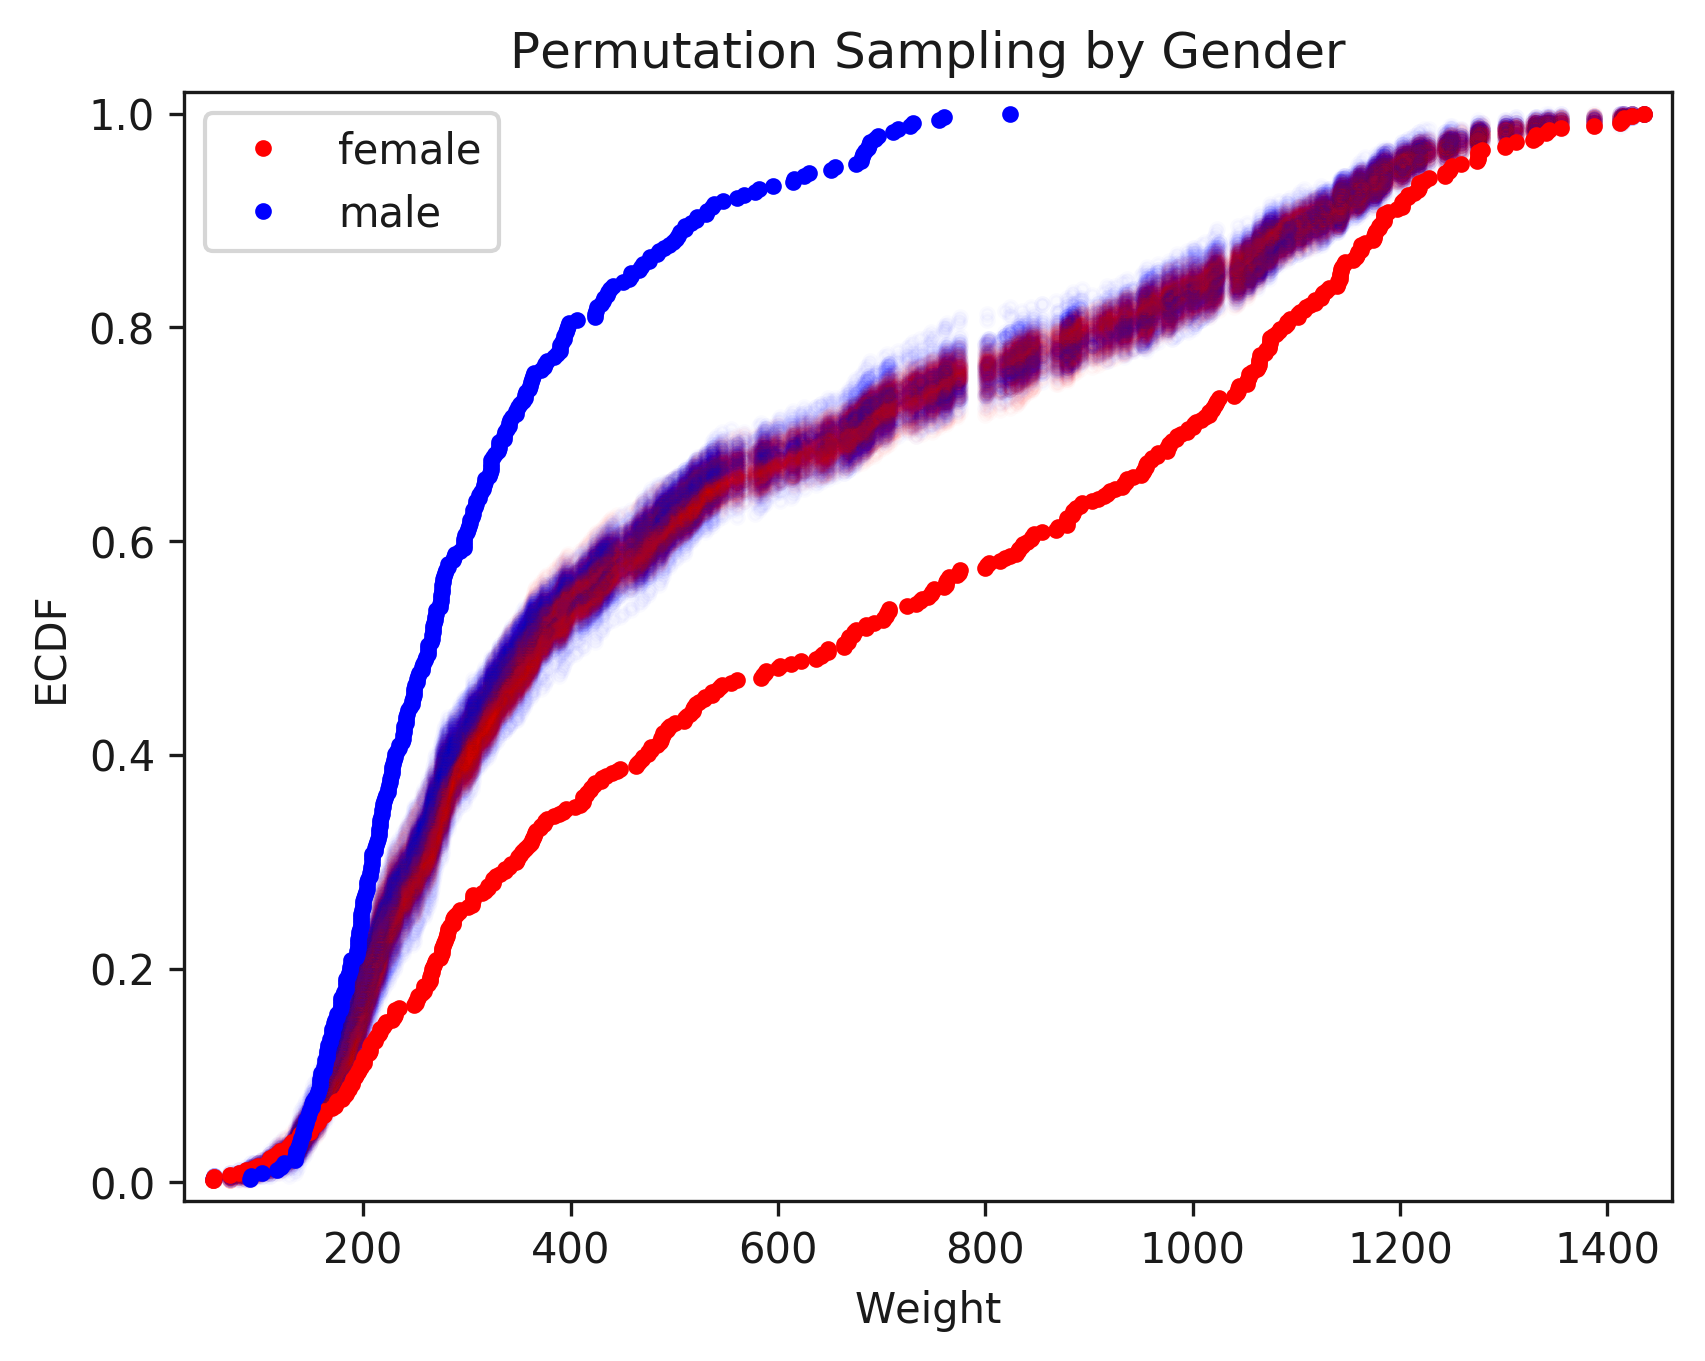

In [10]:
#Hyposis: DIFFERENT distribution between genders
native_females = natives[(natives['Gender']=='f')]
native_males = natives[(natives['Gender']=='m')]
#&(natives['Gender']=='f')
dimension = 'Weight'
_ = plt.figure(7)
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = hlp.permutation_sample(native_females[dimension],native_males[dimension])

    # Compute ECDFs
    x_1, y_1 = hlp.ecdf(perm_sample_1)
    x_2, y_2 = hlp.ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = hlp.ecdf(native_females[dimension])
x_2, y_2 = hlp.ecdf(native_males[dimension])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label='female')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='male')
_ = plt.legend()
_ = plt.title('Permutation Sampling by Gender')
# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel(dimension)
_ = plt.ylabel('ECDF')
plt.show()



# Correlations between annuli, size and weight.
Annuli is less of a predictor of an animals size/weight, however, size and weight are strongly correlated.

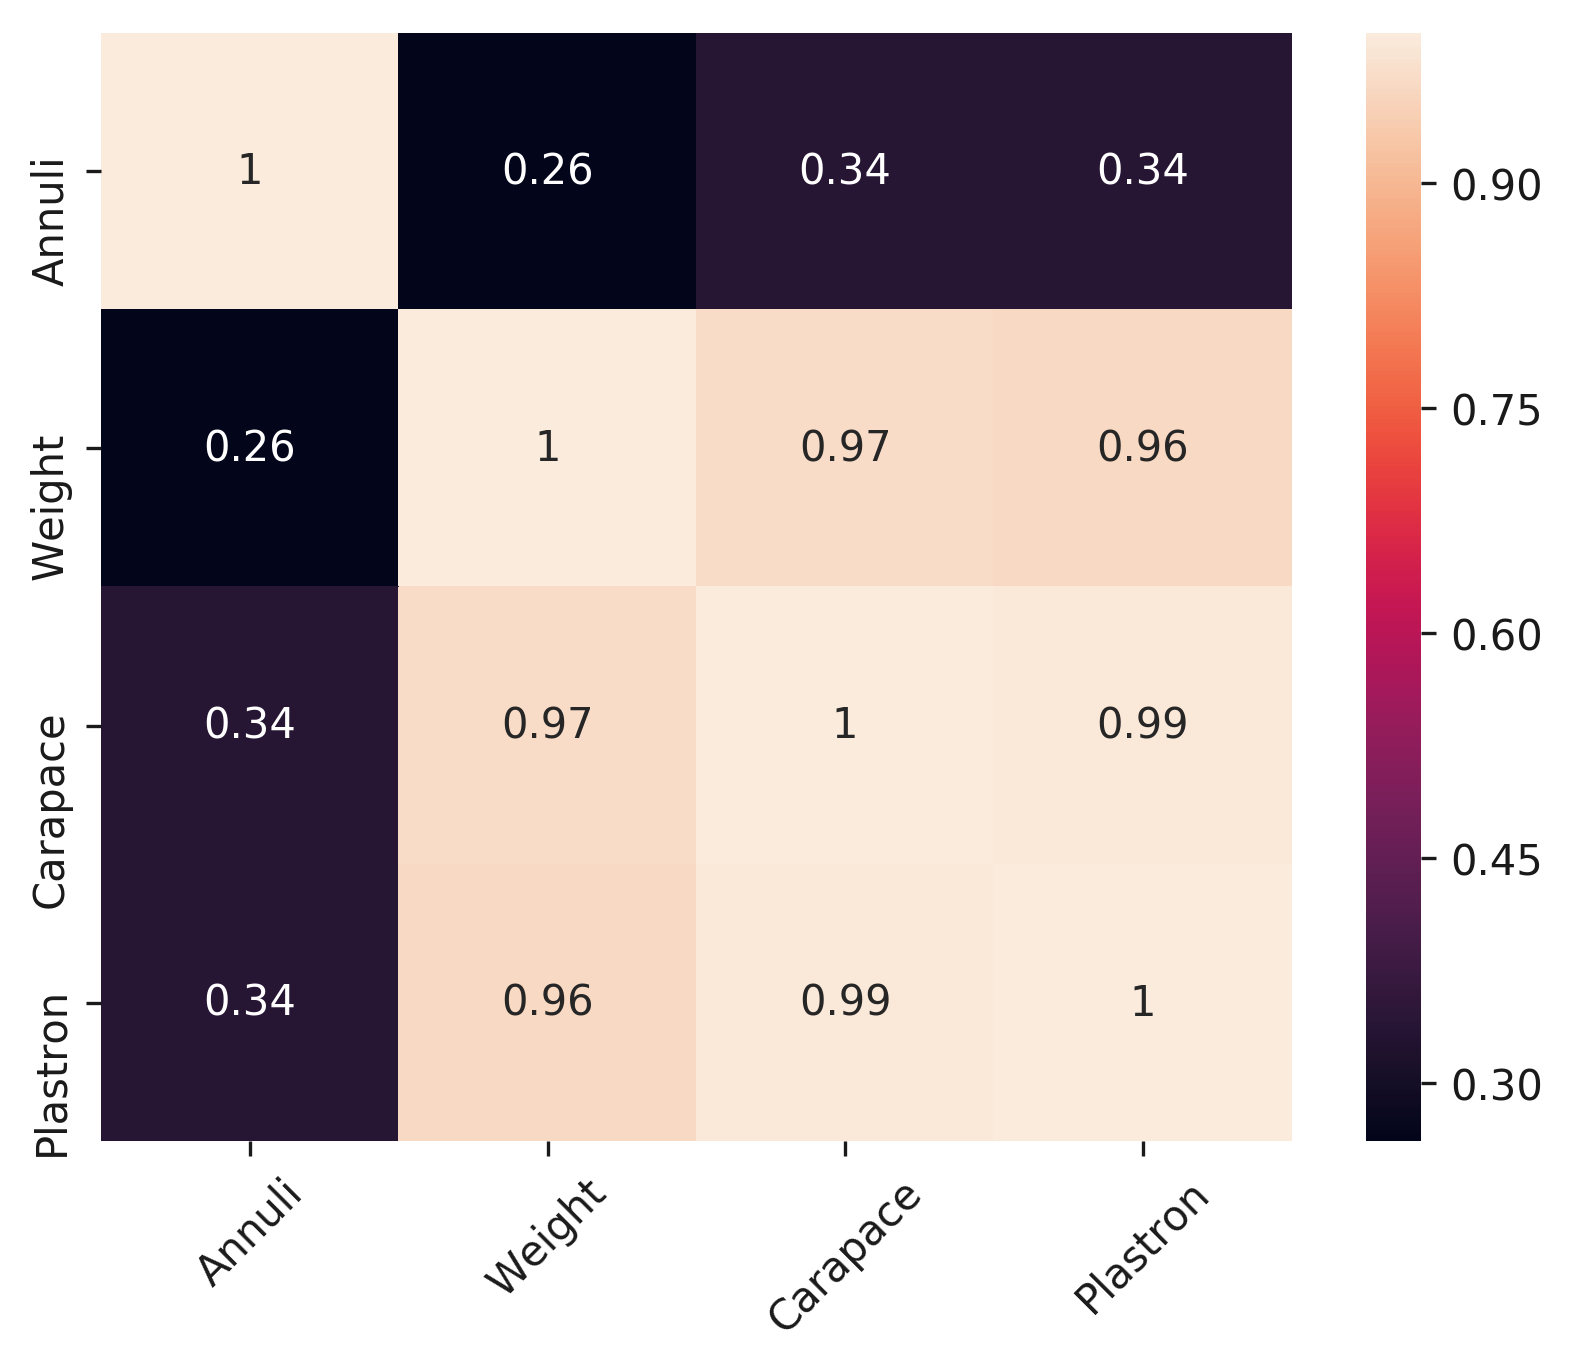

In [11]:
corrleations = native_males.loc[slice(None),['Annuli','Weight','Carapace','Plastron']].corr()

_ = sns.heatmap(corrleations,annot=True)
_ = plt.xticks(rotation=45)
_ = plt.show()


# Distribution of weights and sizes by sex, separating out gravid and non-gravid females
In general suggests that pregnant females are the heaviest group, but I would like to see average values for each group.  Is that possible to include in the graph?  i.e. for gravid females, have a larger gold colored dot in the graph that shows the average carapace size, etc. same for non-gravid females, for males and for unknowns.  Then do the same for plastron and weight.

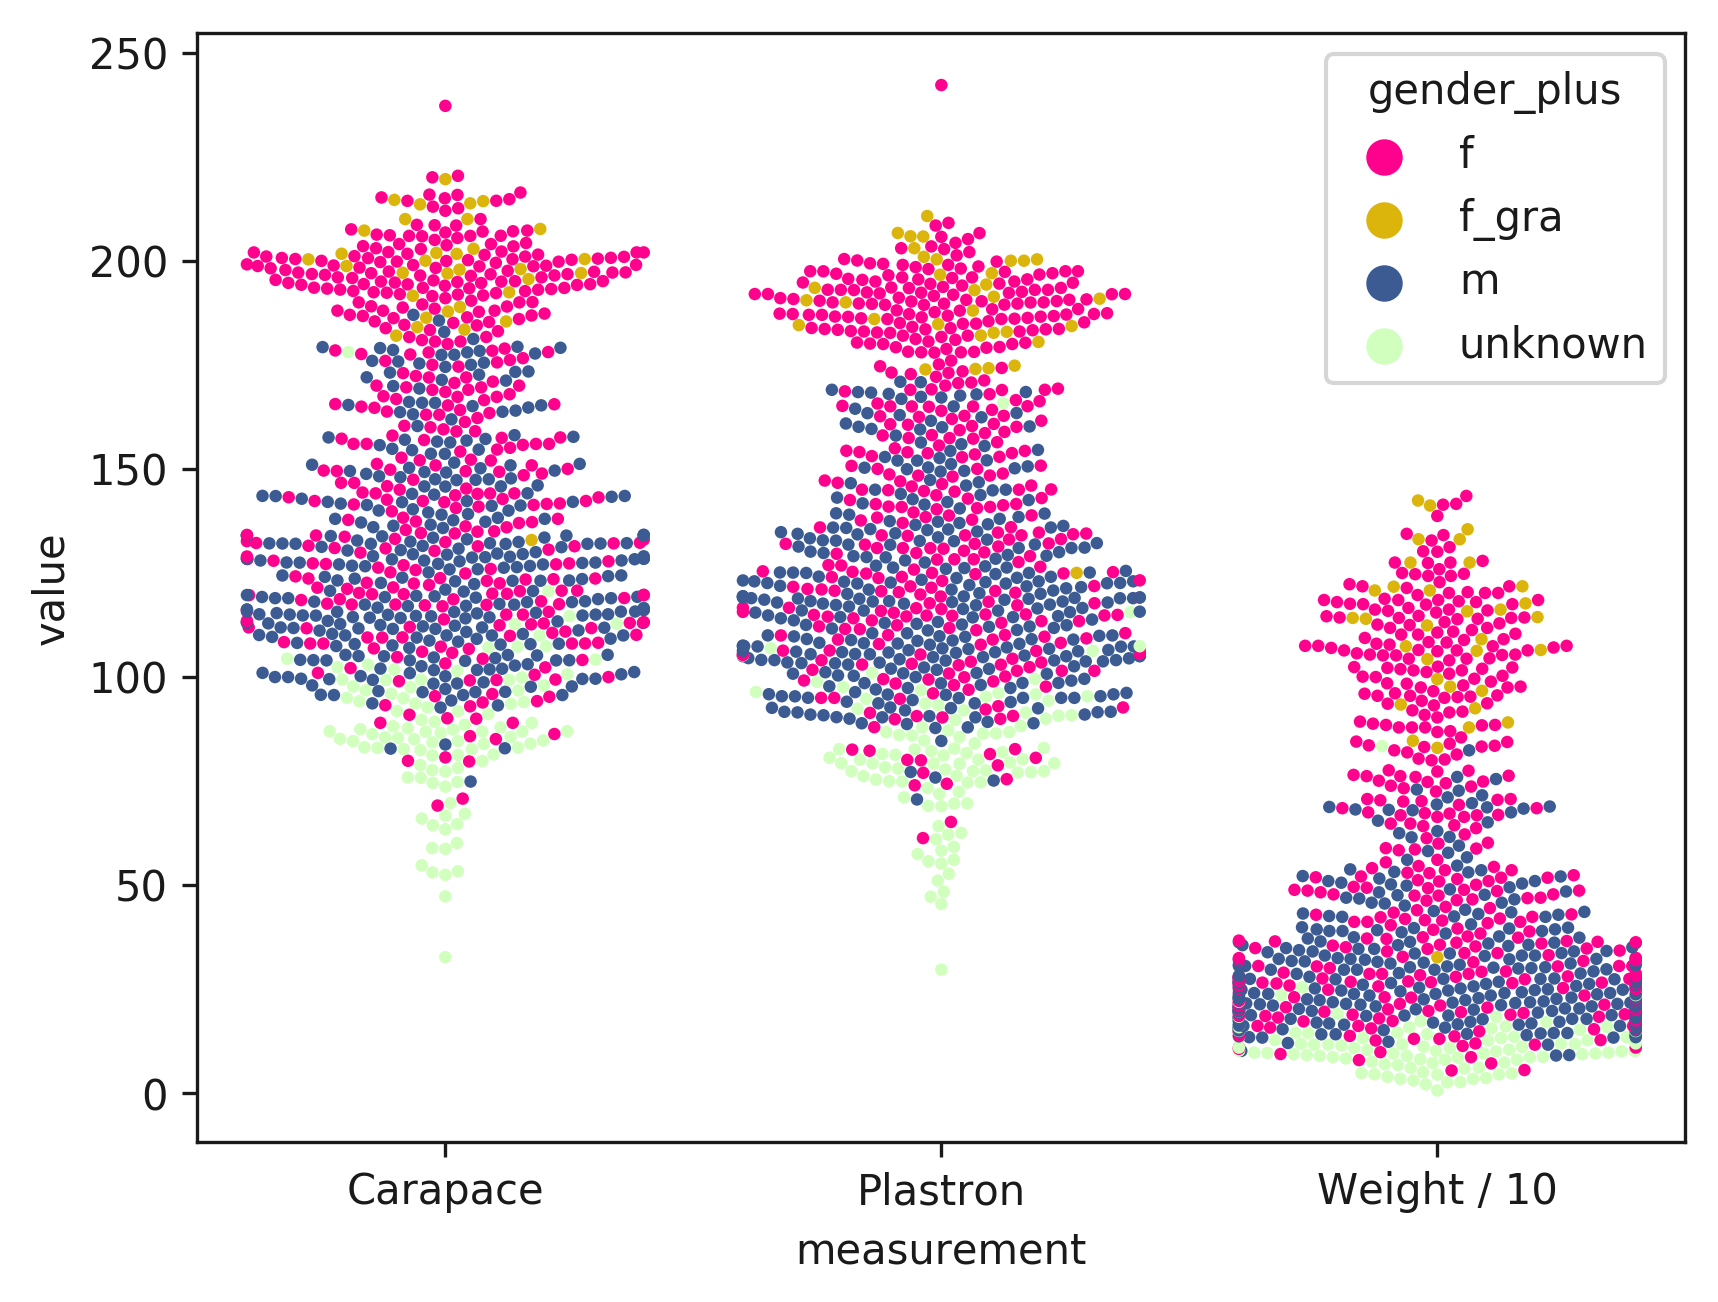

In [12]:
#
colors = {
    'f_spr': sns.xkcd_rgb['soft pink'],
    'f_fal': sns.xkcd_rgb['hot pink'],
    'f_gra': sns.xkcd_rgb['gold'],
    'm_spr': sns.xkcd_rgb['baby blue'],
    'm_fal': sns.xkcd_rgb['denim blue'],
    'unknown': sns.xkcd_rgb['very light green'],
    'f': sns.xkcd_rgb['hot pink'],
    'm': sns.xkcd_rgb['denim blue'],
}
natives_melted = natives.copy()
natives_melted['Weight / 10'] = natives_melted.Weight.div(10)
natives_melted = pd.melt(natives_melted[['Carapace','Plastron','Weight / 10','gender_plus']],'gender_plus',var_name='measurement')

_ = sns.swarmplot(x="measurement", y="value", hue="gender_plus", data=natives_melted,palette=colors,size=3)
_ = plt.show()


# Scatterplot graph showing correlation of annuli with size/weights of animals by sex with gravid females separated out from non-gravid females.
Same as above - showing relationship between size/weight and age for gravid females, non-gravid females, males and unknowns.  Can we include the averages on this graph too?

In [ ]:
# scatterplot with linear digression 
#sns.set()
import statsmodels
natives = natives[natives['Gender']!='unknown']
is_robust = False


### Swarmplot with Hue and Linear Digression 
natives = natives[natives['new_annuli']!=0]
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
plt.rcParams['figure.dpi'] = 500
print ("NEW ANNULI - Plotting scatter plot with hue  " + str(natives.Weight.count()) + ' samples...')
lmplotParams = {
    'x': 'new_annuli', 
    'y': 'Carapace', 
    'hue': 'gender_plus',
    'col': "Capture Location",
    'data': natives,
    'palette': colors,
    'scatter': True,
    'fit_reg': True,
    'lowess': True,
    'legend_out': False,
    'x_jitter': .5,
    'y_jitter': .1,
    'scatter_kws': {"s": 7,"alpha": .7},
}
sns.set()
_ = plt.figure(5)
#lowess=True, too bus
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Carapace')
lmplotParams['y'] = 'Plastron'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Plastron')
lmplotParams['y'] = 'Weight'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Weight')


NEW ANNULI - Plotting scatter plot with hue  767 samples...


<Figure size 3200x2400 with 0 Axes>

# Scatterplot showing distribution of sizes and weights as a function of which season the female data was collected.
Same as the two graphs above.  Shows distribution of sizes and weights and separates out females in to 3 groups (non-gravid spring, gravid spring and fall measurements) as well as males and unknowns.

In [ ]:
natives_melted = natives.copy()
natives_melted['Weight / 10'] = natives_melted.Weight.div(10)
natives_melted = pd.melt(natives_melted[['Carapace','Plastron','Weight / 10','gender_seasons']],'gender_seasons',var_name='measurement')

_ = sns.swarmplot(x="measurement", y="value", hue="gender_seasons", data=natives_melted,palette=colors,size=3)
_ = plt.show()

# Comparison of size/weight distributions across seasons between Gresham and Mason Flats populations
Comparison of size/weight distributions by sex for animals caught in the spring vs fall between two populations (Gresham and Mason Flats).

In [ ]:
import statsmodels
natives = natives[natives['Gender']!='unknown']
is_robust = False


### Swarmplot with Hue and Linear Digression 
natives = natives[natives['new_annuli']!=0]
#colors = [sns.xkcd_rgb['pale red'],sns.xkcd_rgb['denim blue'],sns.xkcd_rgb['medium green']]
plt.rcParams['figure.dpi'] = 500
print ("NEW ANNULI - Plotting scatter plot with hue  " + str(natives.Weight.count()) + ' samples...')
lmplotParams = {
    'x': 'new_annuli', 
    'y': 'Carapace', 
    'hue': 'gender_seasons',
    'col': "Capture Location",
    'data': natives,
    'palette': colors,
    'scatter': True,
    'fit_reg': False,
    #'lowess': True,
    'legend_out': False,
    'x_jitter': .5,
    'y_jitter': .1,
    'scatter_kws': {"s": 7,"alpha": .7},
}
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Carapace')
lmplotParams['y'] = 'Plastron'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Plastron')
lmplotParams['y'] = 'Weight'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Weight')


# Comparison of size/weight distributions across seasons between Gresham and Mason Flats populations
Same as above graphs, but with higher-order polynomial regression lines.  Comparison of size/weight distributions by sex for animals caught in the spring vs fall between two populations (Gresham and Mason Flats).  Males show no real difference in distribution between populations or seasons.  Females have a greater diversity of sizes/weights and are heavier in fall vs spring, with gravid females being the heaviest on average.

In [ ]:
#lmplotParams['lowess'] = False
lmplotParams['order'] = 2
lmplotParams['ci'] = None
lmplotParams['fit_reg'] = True
lmplotParams['truncate'] = True

lmplotParams['y'] = 'Carapace'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Carapace')
plt.show()
lmplotParams['y'] = 'Plastron'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Plastron')
plt.show()
lmplotParams['y'] = 'Weight'
_ = sns.lmplot(**lmplotParams)
_ = plt.ylabel('Weight')
plt.show()